## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import importlib
import lanes
%matplotlib inline
importlib.reload(lanes)

<module 'lanes' from '/Users/neo/Workspace/carnd/CarND-Advanced-Lane-Lines/lanes.py'>

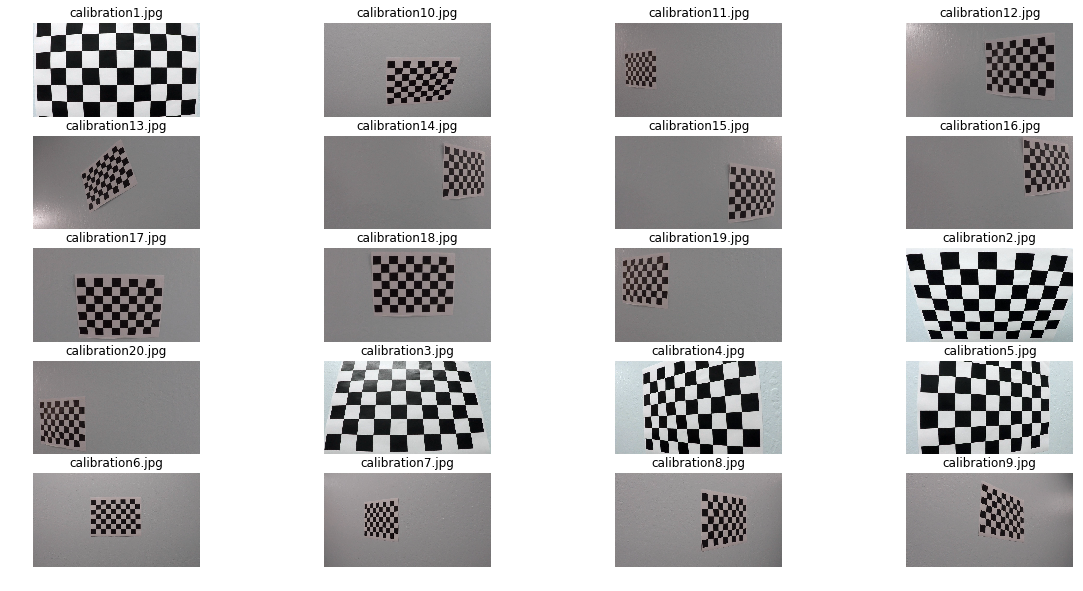

In [3]:
cal_files = glob.glob('camera_cal/calibration*.jpg')
cal_images = [cv2.imread(cal_file) for cal_file in cal_files]

plt.figure(figsize=(20,10))

for index, img in enumerate(cal_images):
    plt.subplot(len(cal_images)//4, 4, index + 1)
    plt.imshow(img)
    plt.title(cal_files[index].split('/')[1])
    plt.axis('off')

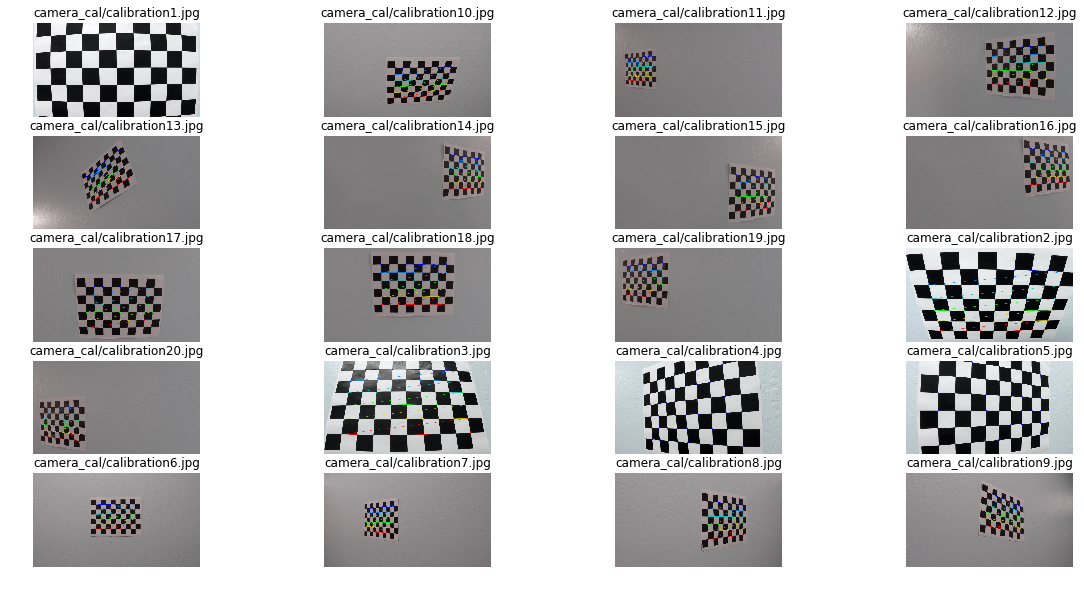

In [4]:
distortion = lanes.Distortion((9,6))
distortion.train(cal_images)

plt.figure(figsize=(20,10))
for index,img in enumerate(cal_images):
    img = distortion.draw_chessboard(img)
    plt.subplot(len(cal_images) // 4, 4, index + 1)
    plt.imshow(img)
    plt.title(cal_files[index])
    plt.axis('off')

## Undistort images

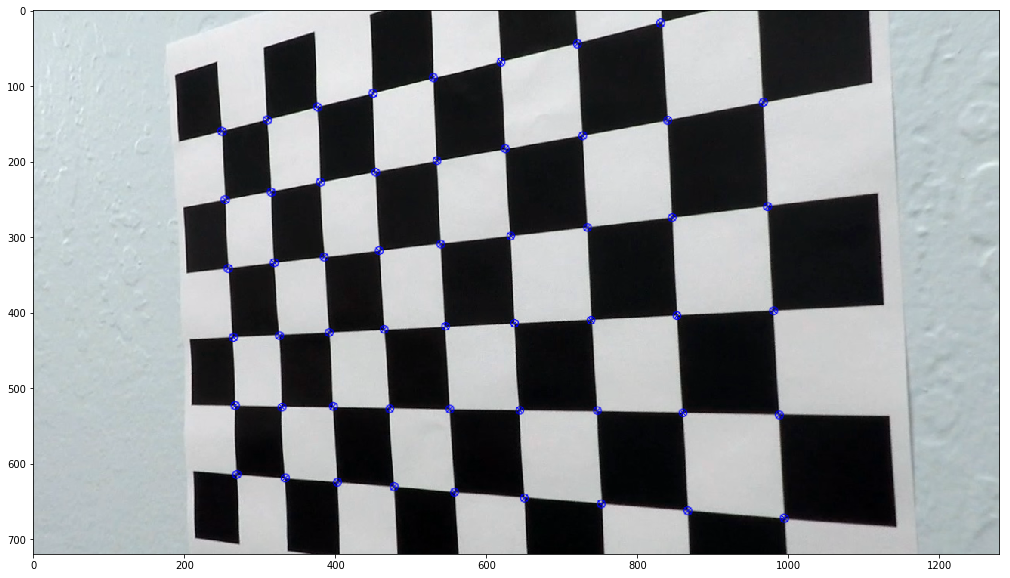

In [40]:
cal4_img = cv2.imread('camera_cal/calibration4.jpg')
undistorted4_img = undistort(cal4_img, objpoints,imgpoints)
fplt.subplots()
plt.imshow(undistorted4_img)